In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd 
import numpy as np
df=pd.read_csv('/content/drive//My Drive/entity_train.csv')

df1=df[['type','Sentence ID','Text','Semantic Type']]

df1=df1[df1['type']=='entity']  #We take only the entities i.e. removing the text and relation

df1=df1[['Sentence ID','Text','Semantic Type']]

df1=df1.rename(columns={'Sentence ID':'sentence_idx','Text':'word','Semantic Type':'tag'})

index_train=df1.index


seq_train=[]
seq_train.append(df1['sentence_idx'][index_train[0]])
print(len(df1['sentence_idx']))
for i in range(1,len(index_train)):
  seq_train.append(df1['sentence_idx'][index_train[i]]-df1['sentence_idx'][index_train[i-1]])
len(seq_train)


neg_ind_train=[]
for i in range(len(seq_train)):
  if seq_train[i]<0:
    seq_train[i]=1
    neg_ind_train.append(i)

df1=df1.assign(ind_train=seq_train)
sen_id=df1['ind_train'].cumsum()
df1=df1.assign(sentence_idx=sen_id)
df1=df1.drop('ind_train',1)
tag_req=['diap','fndg','lbpr','lbtr']

df1=df1.dropna()

df2=df1[df1.tag.str.contains('|'.join(tag_req))]

req_train=df2.index

for i in df1.index:
  if i not in req_train:
    df1.tag[i]='O'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


168687


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
train = df1

In [57]:
train[285:295]

,sentence_idx,word,tag
429,67.0,time,O
430,67.0,face,O
431,67.0,40 percent face mask,O
434,68.0,hematocrit,lbpr
435,68.0,time,O
438,69.0,guaiac positive,lbtr
439,69.0,time,O
442,70.0,mental status,fndg
445,71.0,patient,O
446,71.0,well,O


In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd 
import numpy as np
dftest=pd.read_csv('/content/drive//My Drive/entity_test.csv')

dftest1=dftest[['type','Sentence ID','Text','Semantic Type']]

dftest1=dftest1[dftest1['type']=='entity']  #We take only the entities i.e. removing the text and relation

dftest1=dftest1[['Sentence ID','Text','Semantic Type']]

dftest1=dftest1.rename(columns={'Sentence ID':'sentence_idx','Text':'word','Semantic Type':'tag'})

index_test=dftest1.index


seq_test=[]
seq_test.append(dftest1['sentence_idx'][index_test[0]])
print(len(dftest1['sentence_idx']))
for i in range(1,len(index_test)):
  seq_test.append(dftest1['sentence_idx'][index_test[i]]-dftest1['sentence_idx'][index_test[i-1]])
len(seq_test)


neg_ind_test=[]
for i in range(len(seq_test)):
  if seq_test[i]<0:
    seq_test[i]=1
    neg_ind_test.append(i)

dftest1=dftest1.assign(ind_test=seq_test)
sen_id=dftest1['ind_test'].cumsum()
dftest1=dftest1.assign(sentence_idx=sen_id)
dftest1=dftest1.drop('ind_test',1)
tag_req=['diap','fndg','lbpr','lbtr']

dftest1=dftest1.dropna()

dftest2=dftest1[dftest1.tag.str.contains('|'.join(tag_req))]

req_test=dftest2.index

for i in dftest1.index:
  if i not in req_test:
    dftest1.tag[i]='O'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,19,20,24,25,32,33,47,48,49,50,51,52,53,54,60,61,67,68) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


273088


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
train[285:295]

,sentence_idx,word,tag
429,67.0,time,O
430,67.0,face,O
431,67.0,40 percent face mask,O
434,68.0,hematocrit,lbpr
435,68.0,time,O
438,69.0,guaiac positive,lbtr
439,69.0,time,O
442,70.0,mental status,fndg
445,71.0,patient,O
446,71.0,well,O


In [0]:
test=dftest1

In [6]:
test[285:295]

,sentence_idx,word,tag
374,37.0,coronary arteries,O
375,37.0,left,O
376,37.0,radial artery,O
377,37.0,right coronary,O
378,37.0,artery,O
382,38.0,Significant,O
383,38.0,times,O
384,38.0,operation,O
385,38.0,cardiopulmonary bypass time,fndg
386,38.0,minutes,O


In [0]:
#Define Sentence Getter
class SentenceGetter(object):
    
    def __init__(self, dataset):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [(w, t) for w,t in zip(s["word"].values.tolist(),
                                                        s["tag"].values.tolist())]
        self.grouped = self.dataset.groupby("sentence_idx").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None
          
getter_train = SentenceGetter(train)
sentences_train = getter_train.sentences

getter_test = SentenceGetter(test)
sentences_test = getter_test.sentences

In [59]:
print(sentences_test[5:7])

[[('stress test', 'diap'), ('abnormal', 'fndg'), ('cardiac catheterization', 'O')], [('Cardiac catheterization', 'O'), ('10-Mar', 'O'), ('Hospital', 'O')]]


In [41]:
print(len(words_all))
print(len(words_test))
print(len(words_train))

34805
24035
21063


In [43]:
print(tags_test)
print(tags_train)
print(tags_all)

['O', 'lbpr', 'lbtr', 'fndg', 'diap,inpr', 'diap']
['O', 'lbpr', 'lbtr', 'lbpr,mbrt', 'fndg', 'diap,inpr', 'diap']
['O', 'lbpr', 'lbtr', 'lbpr,mbrt', 'fndg', 'diap,inpr', 'diap']


In [0]:
#formation of words and tags

from math import nan

#for train

words_train = list(set(train["word"].values))
n_words_train = len(words_train)

tags_train = []
for tag in set(train["tag"].values):
    if tag is nan or isinstance(tag, float):
        tags_train.append('unk')
    else:
        tags_train.append(tag)
n_tags_train = len(tags_train)

#for test
words_test = list(set(test["word"].values))
n_words_test = len(words_test)

tags_test = []
for tag in set(test["tag"].values):
    if tag is nan or isinstance(tag, float):
        tags_test.append('unk')
    else:
        tags_test.append(tag)
n_tags_test = len(tags_test)

#for union of train and test

words_all = list(set().union(words_train,words_test))
n_words_all = len(words_all)

tags_all = list(set().union(tags_train,tags_test))
n_tags_all = len(tags_all)

In [30]:
tags_all

['O', 'lbpr', 'lbtr', 'lbpr,mbrt', 'fndg', 'diap,inpr', 'diap']

In [31]:
tags_train

['O', 'lbpr', 'lbtr', 'lbpr,mbrt', 'fndg', 'diap,inpr', 'diap']

In [32]:
tags_test

['O', 'lbpr', 'lbtr', 'fndg', 'diap,inpr', 'diap']

In [0]:
##formation of word2id, tag2id and id2tag

from future.utils import iteritems

#for train
#word2idx_train = {w: i for i, w in enumerate(words_train)}
#tag2idx_train = {t: i for i, t in enumerate(tags_train)}
#idx2tag_train = {v: k for k, v in iteritems(tag2idx_train)}

#for test
#word2idx_test = {w: i for i, w in enumerate(words_test)}
#tag2idx_test = {t: i for i, t in enumerate(tags_test)}
#idx2tag_test = {v: k for k, v in iteritems(tag2idx_test)}

#for all union of train and test
word2idx_all = {w: i for i, w in enumerate(words_all)}
tag2idx_all = {t: i for i, t in enumerate(tags_all)}
idx2tag_all = {v: k for k, v in iteritems(tag2idx_all)}

In [46]:
maxlen_all = max(max([len(s) for s in sentences_train]),max([len(s) for s in sentences_test]))
print(maxlen_all)

174


In [0]:
##vectorisation

from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

#for train

maxlen_train = max([len(s) for s in sentences_train])

X_train = [[word2idx_all[w[0]] for w in s] for s in sentences_train]
X_train = pad_sequences(maxlen=maxlen_all, sequences=X_train, padding="post",value=n_words_all - 1)

y_train = [[tag2idx_all[w[1]] for w in s] for s in sentences_train]
y_train = pad_sequences(maxlen=maxlen_all, sequences=y_train, padding="post", value=tag2idx_all["O"])
y_train = [to_categorical(i, num_classes=n_tags_all) for i in y_train]


#for test
maxlen_test = max([len(s) for s in sentences_test])

X_test = [[word2idx_all[w[0]] for w in s] for s in sentences_test]
X_test = pad_sequences(maxlen=maxlen_all, sequences=X_test, padding="post",value=n_words_all - 1)

y_test = [[tag2idx_all[w[1]] for w in s] for s in sentences_test]
y_test = pad_sequences(maxlen=maxlen_all, sequences=y_test, padding="post", value=tag2idx_all["O"])
y_test = [to_categorical(i, num_classes=n_tags_all) for i in y_test]

In [0]:
#for all
#maxlen_all = max([len(s) for s in sentences_all])

#X_all = [[word2idx_all[w[0]] for w in s] for s in sentences_all]
#X_all = pad_sequences(maxlen=maxlen_all, sequences=X_all, padding="post",value=n_words_all - 1)

#y_all = [[tag2idx_all[w[1]] for w in s] for s in sentences_all]
#y_all = pad_sequences(maxlen=maxlen_all, sequences=y_all, padding="post", value=tag2idx_all["O"])
#y_all = [to_categorical(i, num_classes=n_tags_all) for i in y_all]

In [23]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-286kxkz6
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-286kxkz6
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=ba55cdb26e17f11d7059e5f859fc2f6606d2e8467f29b0debd8d283286e4e176
  Stored in directory: /tmp/pip-ephem-wheel-cache-1pwe44u1/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [0]:
##MODEL

from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
import keras as k
from keras_contrib.layers import CRF

input = Input(shape=(max(X_train.shape[1],X_test.shape[1]),))
word_embedding_size = 180

# Embedding Layer
model = Embedding(input_dim=n_words_all, output_dim=word_embedding_size, input_length=max(X_train.shape[1],X_test.shape[1]))(input)

# BI-LSTM Layer
model = Bidirectional(LSTM(units=word_embedding_size, 
                           return_sequences=True, 
                           dropout=0.5, 
                           recurrent_dropout=0.5, 
                           kernel_initializer=k.initializers.he_normal()))(model)
model = LSTM(units=word_embedding_size * 2, 
             return_sequences=True, 
             dropout=0.5, 
             recurrent_dropout=0.5, 
             kernel_initializer=k.initializers.he_normal())(model)

# TimeDistributed Layer
model = TimeDistributed(Dense(n_tags_all, activation="relu"))(model)  

# CRF Layer
crf = CRF(n_tags_all)

out = crf(model)  # output
model = Model(input, out)

In [26]:
##FIT MODEL

from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

#Optimiser 
adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

# Compile model
model.compile(optimizer=adam, loss=crf.loss_function, metrics=[crf.accuracy, 'accuracy'])

model.summary()

# Saving the best model only
filepath="ner-bi-lstm-td-model-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the best model
history = model.fit(X_train, np.array(y_train), batch_size=128, epochs=10, validation_split=0.1, verbose=1, callbacks=callbacks_list)

/usr/local/lib/python3.6/dist-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/usr/local/lib/python3.6/dist-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 174)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 174, 180)          6264900   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 174, 360)          519840    
_________________________________________________________________
lstm_2 (LSTM)                (None, 174, 360)          1038240   
_________________________________________________________________
time_distributed_1 (TimeDist (None, 174, 7)            2527      
_________________________________________________________________
crf_1 (CRF)                  (None, 174, 7)            119       
Total params: 7,825,626
Trainable params: 7,825,626
Non-trainable params: 0
_________________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 29345 samples, validate on 3261 samples
Epoch 1/10
29345/29345 [==============================] - 402s 14ms/step - loss: 0.0134 - crf_viterbi_accuracy: 0.9970 - accuracy: 0.9969 - val_loss: 0.0049 - val_crf_viterbi_accuracy: 0.9980 - val_accuracy: 0.9981

Epoch 00001: val_accuracy improved from -inf to 0.99807, saving model to ner-bi-lstm-td-model-1.00.hdf5
Epoch 2/10
29345/29345 [==============================] - 403s 14ms/step - loss: 0.0021 - crf_viterbi_accuracy: 0.9986 - accuracy: 0.9969 - val_loss: 7.2756e-04 - val_crf_viterbi_accuracy: 0.9989 - val_accuracy: 0.9989

Epoch 00002: val_accuracy improved from 0.99807 to 0.99892, saving model to ner-bi-lstm-td-model-1.00.hdf5
Epoch 3/10
29345/29345 [==============================] - 400s 14ms/step - loss: -7.7152e-04 - crf_viterbi_accuracy: 0.9992 - accuracy: 0.9969 - val_loss: -8.2410e-05 - val_crf_viterbi_accuracy: 0.9990 - val_accuracy: 0.9990

Epoch 00003: val_accuracy improved from 0.99892 to 0.99895, saving model to ne

In [27]:
idx2tag_train

{0: 'O',
 1: 'lbpr',
 2: 'lbtr',
 3: 'lbpr,mbrt',
 4: 'fndg',
 5: 'diap,inpr',
 6: 'diap'}

In [28]:
idx2tag_test

{0: 'O', 1: 'lbpr', 2: 'lbtr', 3: 'fndg', 4: 'diap,inpr', 5: 'diap'}

In [29]:
idx2tag_all

{0: 'O',
 1: 'lbpr',
 2: 'lbtr',
 3: 'lbpr,mbrt',
 4: 'fndg',
 5: 'diap,inpr',
 6: 'diap'}

In [50]:
##FIT MODEL

from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

#Optimiser 
adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

# Compile model
model.compile(optimizer=adam, loss=crf.loss_function, metrics=[crf.accuracy, 'accuracy'])

model.summary()

# Saving the best model only
filepath="ner-bi-lstm-td-model-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the best model
history = model.fit(X_train, np.array(y_train), batch_size=128, epochs=3, validation_split=0.1, verbose=1, callbacks=callbacks_list)

/usr/local/lib/python3.6/dist-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/usr/local/lib/python3.6/dist-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 174)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 174, 180)          6264900   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 174, 360)          519840    
_________________________________________________________________
lstm_4 (LSTM)                (None, 174, 360)          1038240   
_________________________________________________________________
time_distributed_2 (TimeDist (None, 174, 7)            2527      
_________________________________________________________________
crf_2 (CRF)                  (None, 174, 7)            119       
Total params: 7,825,626
Trainable params: 7,825,626
Non-trainable params: 0
_________________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 29345 samples, validate on 3261 samples
Epoch 1/3
29345/29345 [==============================] - 484s 16ms/step - loss: 0.0482 - crf_viterbi_accuracy: 0.9968 - accuracy: 0.9969 - val_loss: 0.0187 - val_crf_viterbi_accuracy: 0.9969 - val_accuracy: 0.9970

Epoch 00001: val_accuracy improved from -inf to 0.99697, saving model to ner-bi-lstm-td-model-1.00.hdf5
Epoch 2/3
29345/29345 [==============================] - 467s 16ms/step - loss: 0.0176 - crf_viterbi_accuracy: 0.9969 - accuracy: 0.9969 - val_loss: 0.0156 - val_crf_viterbi_accuracy: 0.9969 - val_accuracy: 0.9970

Epoch 00002: val_accuracy improved from 0.99697 to 0.99697, saving model to ner-bi-lstm-td-model-1.00.hdf5
Epoch 3/3
29345/29345 [==============================] - 457s 16ms/step - loss: 0.0122 - crf_viterbi_accuracy: 0.9978 - accuracy: 0.9969 - val_loss: 0.0097 - val_crf_viterbi_accuracy: 0.9986 - val_accuracy: 0.9986

Epoch 00003: val_accuracy improved from 0.99697 to 0.99858, saving model to ner-bi-lstm-td-mode

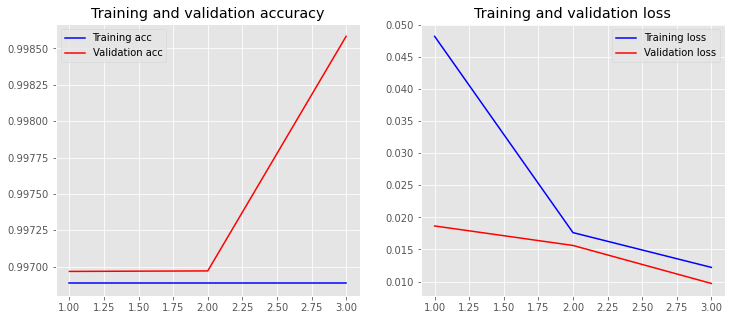

In [51]:
# Plot the graph 
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training acc')
    plt.plot(x, val_accuracy, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [52]:
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag_all[p_i])
        out.append(out_i)
    return out
test_pred = model.predict(X_test, verbose=1)   
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_test)

49758/49758 [==============================] - 321s 6ms/step


In [53]:
! pip install seqeval

  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=374d3c4ab41ee120588b753da4764b66c0748b0445ff2559145eece6ef358a5d
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
Successfully built seqeval


In [54]:
#####REPORT of the fit

from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

F1-score: 59.2%


In [55]:
! pip install sklearn_crfsuite

     |████████████████████████████████| 747kB 3.2MB/s 


In [56]:
from  sklearn_crfsuite.metrics import flat_classification_report  
report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
print(report)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           O       1.00      1.00      1.00   8631389
        diap       0.00      0.00      0.00      3762
   diap,inpr       0.00      0.00      0.00         6
        fndg       0.71      0.79      0.75     18623
        lbpr       0.00      0.00      0.00      3526
        lbtr       0.00      0.00      0.00       586

    accuracy                           1.00   8657892
   macro avg       0.28      0.30      0.29   8657892
weighted avg       1.00      1.00      1.00   8657892

